# Decision Tree -1

Use decision trees to prepare a model on fraud data 
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

# Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_curve,roc_auc_score

# Import Data

In [2]:
Data_Fraud=pd.read_csv("C:\\Users\\shine\\Downloads\\Fraud_check.csv")
Data_Fraud.head(7)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
5,NO,Divorced,33329,116382,0,NO
6,NO,Divorced,83357,80890,8,YES


# Data Understanding

#### Undergrad             : person is under graduated or not
#### Taxable.Income    : Taxable income is the amount of how much tax an individual owes to the government 
#### Work Experience : Work experience of an individual person
#### Urban                    : Whether that person belongs to urban area or not


In [3]:
Data_Fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


<AxesSubplot:xlabel='Work.Experience', ylabel='Density'>

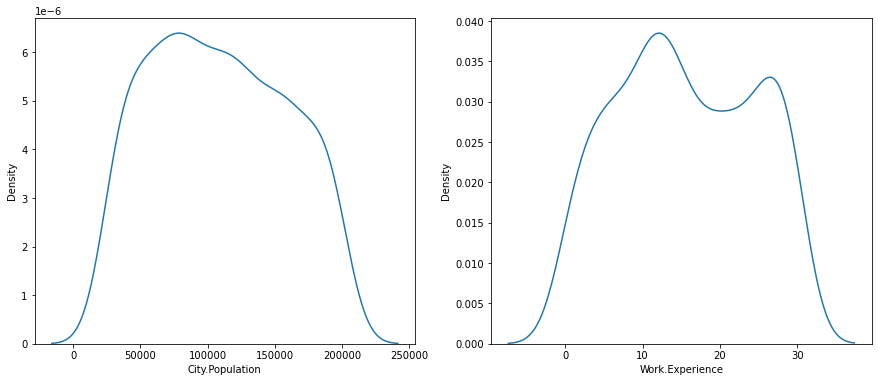

<Figure size 1080x1080 with 0 Axes>

In [4]:
fig,axes=plt.subplots(1,2)
plt.figure(figsize=[15,15])

fig.set_figheight(6)
fig.set_figwidth(15)

sns.kdeplot(x="City.Population", data=Data_Fraud,ax=axes[0])

sns.kdeplot(x="Work.Experience", data=Data_Fraud,ax=axes[1])

<AxesSubplot:xlabel='Work.Experience', ylabel='Density'>

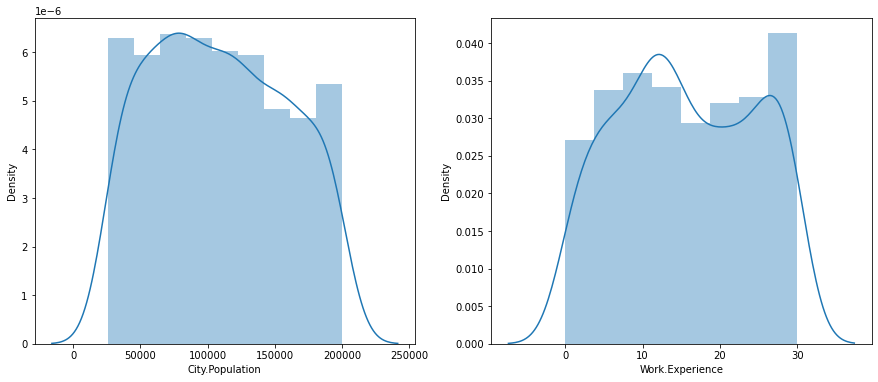

<Figure size 360x1080 with 0 Axes>

In [43]:
fig2,axes2=plt.subplots(1,2)
plt.figure(figsize=[5,15])

fig2.set_figheight(6)
fig2.set_figwidth(15)

sns.distplot(Data_Fraud["City.Population"],ax=axes2[0])

sns.distplot(Data_Fraud["Work.Experience"],ax=axes2[1])

# Data preparation

In [5]:
Income_List=[]
for i in Data_Fraud["Taxable.Income"]:
    if i >30000:
        Income_List.append(1)
    else:
        Income_List.append(0)

In [6]:
Undergrad_List=[]
for i in Data_Fraud["Undergrad"]:
    if i=="YES":
        Undergrad_List.append(1)
    else:
        Undergrad_List.append(0)

In [7]:
Urban_List=[]
for i in Data_Fraud["Urban"]:
    if i=="YES":
        Urban_List.append(1)
    else:
        Urban_List.append(0)

In [8]:
Data_Fraud["Taxable.Income"]=Income_List
Data_Fraud.Undergrad=Undergrad_List
Data_Fraud.Urban=Urban_List

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [10]:
Data_Fraud_Copy=pd.read_csv("C:\\Users\\shine\\Downloads\\Fraud_check.csv")

In [11]:
Data_Fraud_Copy["Marital.Status"]=le.fit_transform(Data_Fraud_Copy["Marital.Status"])

In [12]:
Data_Fraud["Marital.Status"]=Data_Fraud_Copy["Marital.Status"]

In [13]:
Data_Fraud.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,1,50047,10,1
1,1,0,1,134075,18,1
2,0,1,1,160205,30,1
3,1,2,1,193264,15,1
4,0,1,1,27533,28,0


# Model Building

In [14]:
X=Data_Fraud.drop("Taxable.Income",axis=1)
y=Data_Fraud[["Taxable.Income"]]

In [15]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=123)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(480, 5) (480, 1)
(120, 5) (120, 1)


# Model Training

In [16]:
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=123)
dt_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=123)

In [17]:
dt_model.score(X_test,y_test)

0.7833333333333333

# Plot The Tree

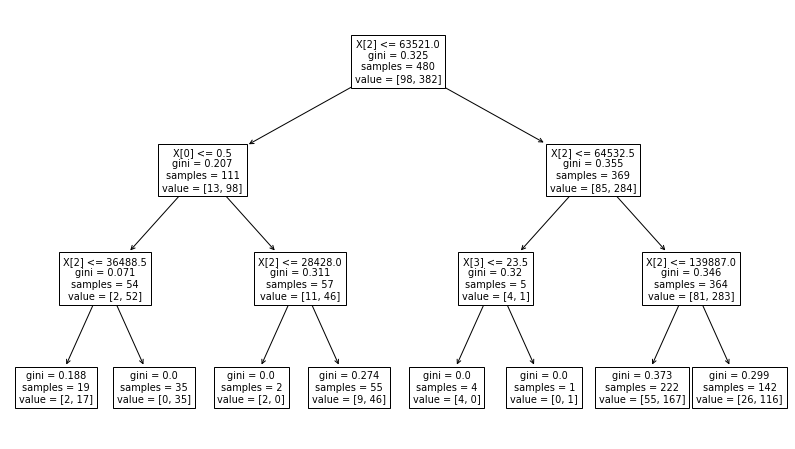

In [18]:
from sklearn.tree import plot_tree
plt.figure(figsize=(14,8))
plot_tree(dt_model)
plt.show()

# Model Optimization
## GridSearch CV

In [19]:
from sklearn.model_selection import GridSearchCV
grid_search_cv = GridSearchCV(estimator = dt_model,
                             param_grid = {'criterion':['gini','entropy'],
                                           'max_depth':[2,3,4,5,6]},
                             cv=5)
grid_search_cv.fit(X,y)
print(grid_search_cv.best_params_)
print(grid_search_cv.best_score_)

{'criterion': 'entropy', 'max_depth': 2}
0.7916666666666666


In [20]:
dt_model_1=DecisionTreeClassifier(criterion='entropy',max_depth=3,random_state=123)
dt_model_1.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=123)

### Evaluating dt_Model_1

In [21]:
dt_model_1.score(X_test,y_test)

0.7833333333333333

In [22]:
y_pred_test = dt_model.predict(X_test)

In [23]:
print(confusion_matrix(y_test,y_pred_test))

[[ 0 26]
 [ 0 94]]


In [24]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        26
           1       0.78      1.00      0.88        94

    accuracy                           0.78       120
   macro avg       0.39      0.50      0.44       120
weighted avg       0.61      0.78      0.69       120



In [25]:
accuracy_score(y_test,y_pred_test)

0.7833333333333333

0.6294609466823379


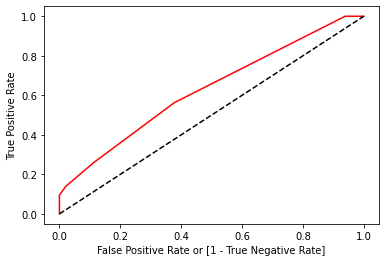

In [26]:
fpr, tpr, thresholds = roc_curve(y_train,dt_model.predict_proba (X_train)[:,1])

auc = roc_auc_score(y_train,dt_model.predict_proba (X_train)[:,1])
print(auc)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='Desision Tree model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.show()

#### Eventhough the model has accuracy score of 0.78 the stability and specificity of the model is very low(determined from the values of precision and recall)

## Data Optimization

<function matplotlib.pyplot.show(close=None, block=None)>

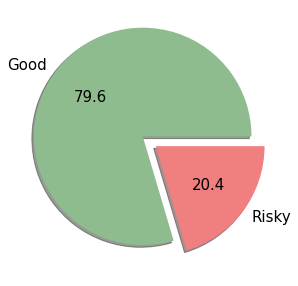

In [45]:
plt.figure(figsize=(8,5))
plt.pie(x=y_train.value_counts(),labels=['Good','Risky'],explode=[0.1,0.05],
        autopct='%0.1f',colors=['darkseagreen','lightcoral'],shadow=True,textprops = {"fontsize":15})
plt.show

#### The Data is Imbalanced

In [28]:
from imblearn.over_sampling import SMOTE
balanced = SMOTE()

X_balanced , y_balanced = balanced.fit_resample(X,y)

In [29]:
Optimized_Data=X_balanced.copy()
Optimized_Data['y']=y_balanced

In [30]:
Optimized_Data.head()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,y
0,0,2,50047,10,1,1
1,1,0,134075,18,1,1
2,0,1,160205,30,1,1
3,1,2,193264,15,1,1
4,0,1,27533,28,0,1


In [31]:
X_train_Opt,X_test_Opt,y_train_Opt,y_test_Opt=train_test_split(X_balanced,y_balanced, test_size=0.2,random_state=123)

print(X_train_Opt.shape)
print(y_train_Opt.shape)

(761, 5)
(761, 1)


In [32]:
Dt_Model_Opt=DecisionTreeClassifier(criterion='entropy',max_depth=4,random_state=123)

In [33]:
Dt_Model_Opt.fit(X_train_Opt,y_train_Opt)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=123)

### Evaluating the New Model with Balanced Data

In [34]:
Optimized_Data['y_predicted']=Dt_Model_Opt.predict(X_balanced)

In [35]:
accuracy_score(y_test_Opt,Dt_Model_Opt.predict(X_test_Opt))

0.6387434554973822

In [36]:
confusion_matrix(y_test_Opt,Dt_Model_Opt.predict(X_test_Opt))

array([[54, 30],
       [39, 68]], dtype=int64)

#### Train Data

In [37]:
print(classification_report(y_train_Opt,Dt_Model_Opt.predict(X_train_Opt)))

              precision    recall  f1-score   support

           0       0.67      0.71      0.69       392
           1       0.67      0.63      0.65       369

    accuracy                           0.67       761
   macro avg       0.67      0.67      0.67       761
weighted avg       0.67      0.67      0.67       761



#### Test data

In [38]:
print(classification_report(y_test_Opt,Dt_Model_Opt.predict(X_test_Opt)))

              precision    recall  f1-score   support

           0       0.58      0.64      0.61        84
           1       0.69      0.64      0.66       107

    accuracy                           0.64       191
   macro avg       0.64      0.64      0.64       191
weighted avg       0.64      0.64      0.64       191



0.7295296167247387


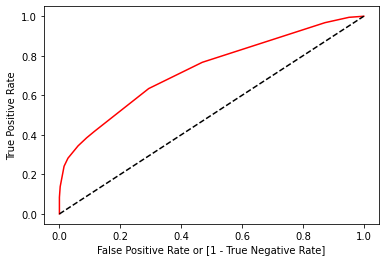

In [39]:
fpr2, tpr2, thresholds2 = roc_curve(y_train_Opt,Dt_Model_Opt.predict_proba (X_train_Opt)[:,1])

auc2 = roc_auc_score(y_train_Opt,Dt_Model_Opt.predict_proba (X_train_Opt)[:,1])
print(auc2)

import matplotlib.pyplot as plt
plt.plot(fpr2, tpr2, color='red', label='Decision Tree model ( area  = %0.2f)'%auc2)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.show()

#### The model has good precision and recall.

## Model Deployment

In [40]:
from pickle import dump,load
dump(Dt_Model_Opt,open('Intel_On_FraudData.pkl','wb'))

In [41]:
Loaded_Int=load(open('Intel_On_FraudData.pkl','rb'))
Loaded_Int.predict(X_test_Opt.head())

array([1, 1, 1, 0, 0], dtype=int64)